In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


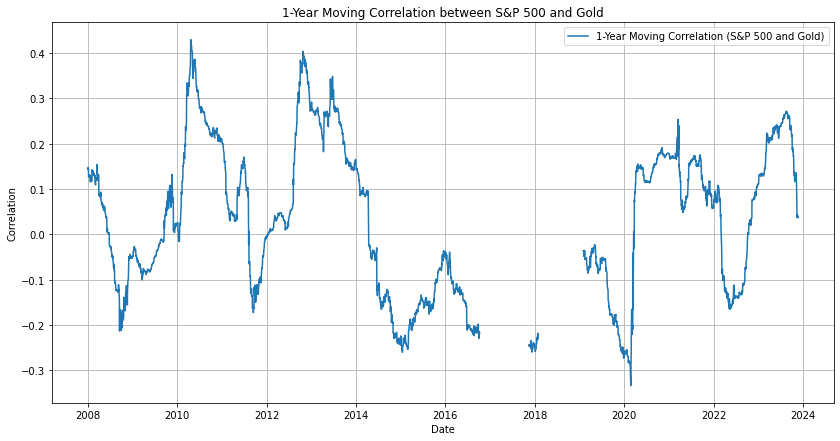

In [4]:
# Define the tickers for S&P 500 and Gold
tickers = {'S&P 500': '^GSPC', 'Gold': 'GC=F'}

# Define the start and end dates
start_date = '2000-01-01'
end_date = '2024-07-06'

# Download the data
data = {}
for name, ticker in tickers.items():
    data[name] = yf.download(ticker, start=start_date, end=end_date)['Adj Close']

# Combine the data into one DataFrame
df = pd.DataFrame(data)

# Calculate log daily returns
log_returns = np.log(df / df.shift(1))

# Calculate the 1-year moving correlation (252 trading days)
moving_corr = log_returns['S&P 500'].rolling(window=252).corr(log_returns['Gold'])

# Plot the 1-year moving correlation
plt.figure(figsize=(14, 7))
plt.plot(moving_corr, label='1-Year Moving Correlation (S&P 500 and Gold)')
plt.title('1-Year Moving Correlation between S&P 500 and Gold')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()